In [4]:
from nilearn import plotting as niplt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mplcolors
import pickle
import itertools
import glob
from collections import OrderedDict
import nibabel as nib
import matplotlib as ml

%load_ext autoreload
%autoreload 1
%aimport base.plotting

In [5]:
from base.classifiers import OnevsallClassifier, PairwiseClassifier
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/datasets/abs_60topics_filt_jul.pkl")

## Classification Performance

In [38]:
clf = OnevsallClassifier.load('../results/classification/oldkmeans60_GNB_t0.05_cog_topics_60/classifier.pkl')

## Functional specialization

### Preprocessing

In [20]:
num_regions = 60
n_topics = 60

In [21]:
## Set up topic nicknames
word_keys = pd.read_csv("../data/unprocessed/abstract_topics_filtered/topic_sets/topic_keys" + str(n_topics) + "-july_cognitive.csv")
word_keys['topic_name'] = "topic" + word_keys['topic'].astype('str')

o_fi = pd.DataFrame(clf.odds_ratio)

# Melt feature importances, and add top_words for each feeature
o_fi['region'] = range(1, o_fi.shape[0] + 1)
o_fis_melt = pd.melt(o_fi, var_name='topic_order', value_name='importance', id_vars=['region'])

word_keys = pd.merge(pd.DataFrame(np.array([range(0, clf.feature_importances.shape[1]), clf.feature_names]).T, columns=['topic_order', 'topic_name']), word_keys)
word_keys.topic_order = word_keys.topic_order.astype('int')

o_fis_melt= pd.merge(o_fis_melt, word_keys)
o_fis_melt['abs_imp'] = np.abs(o_fis_melt['importance'])

In [22]:
def plot_clf_polar(clf, cmap=None, key='nickname', n_topics=60, n_top=3, labels=None, mask=None, selection='top', metric='correlation', max_val=None, return_labels=False):
    import pandas as pd
    import seaborn as sns
    from base.plotting import plot_polar

    ## Set up topic nicknames
    word_keys = pd.read_csv("../data/unprocessed/abstract_topics_filtered/topic_sets/topic_keys" + str(n_topics) + "-july_cognitive.csv")
    word_keys['topic_name'] = "topic" + word_keys['topic'].astype('str')

    o_fi = pd.DataFrame(clf.odds_ratio)

    # Melt feature importances, and add top_words for each feeature
    o_fi['region'] = range(1, o_fi.shape[0] + 1)
    o_fis_melt = pd.melt(o_fi, var_name='topic_order', value_name='importance', id_vars=['region'])

    word_keys = pd.merge(pd.DataFrame(np.array([range(0, clf.feature_importances.shape[1]), clf.feature_names]).T, columns=['topic_order', 'topic_name']), word_keys)
    word_keys.topic_order = word_keys.topic_order.astype('int')

    o_fis_melt= pd.merge(o_fis_melt, word_keys)
    o_fis_melt['abs_imp'] = np.abs(o_fis_melt['importance'])
    
    if mask is not None:
        o_fis_melt = o_fis_melt[o_fis_melt.region.isin(mask)]
    
    pplot = pd.pivot_table(o_fis_melt, values='importance', index=[key], columns=['region'])
    
    if cmap is None:
        cmap = sns.color_palette('Set1', clf.feature_importances.shape[0])

    return plot_polar(pplot, overplot=True, palette=cmap, n_top=n_top, metric=metric, selection=selection, 
        label_size=30, labels=labels, max_val=max_val, return_labels=return_labels)

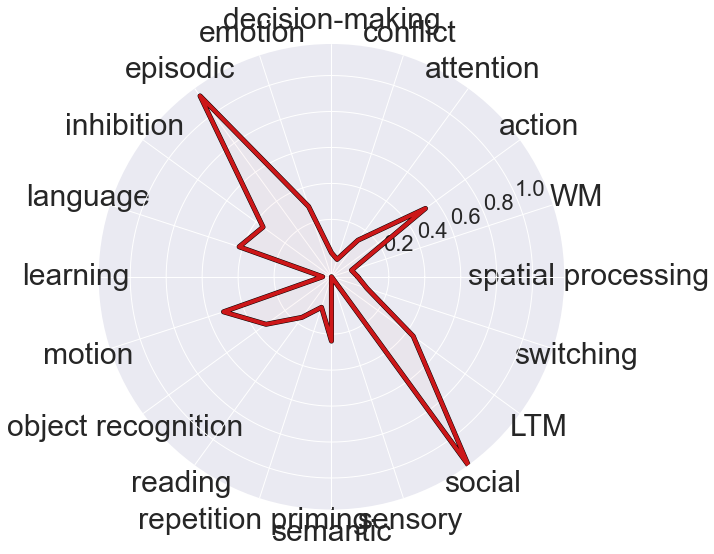

In [88]:
plot_clf_polar(clf, mask=[20], n_top=20)

## Pairwise

In [25]:
pair_clfs = [PairwiseClassifier.load(clf + "/classifier.pkl") for clf in glob.glob("../results/classification/old*Pairwise*/")]

In [26]:
p_clf = pair_clfs[0]

33

## Functional differences

In [77]:
def plot_pclf_polar(p_fi, region_a, regions_b=None, cmap=None, key='nickname', **kwargs):
    import pandas as pd
    import seaborn as sns
    from base.plotting import plot_polar
    
    p_fi = p_fi[p_fi.region_a == region_a]
    
    if regions_b is not None:
        p_fi = p_fi[p_fi.region_b.isin(regions_b)]
        
    pplot = pd.pivot_table(p_fi, values='importance', index=[key], columns=['region_b'])
    
    if cmap is None:
        cmap = sns.color_palette('Set1', p_fi.region_b.unique().shape[0])

    return plot_polar(pplot, overplot=True, palette=cmap, **kwargs)

In [78]:
p_fi = []
n_topics = p_clf.odds_ratio.shape[2]
for i, a in enumerate(p_clf.odds_ratio):
    for j, b in enumerate(a):
        if i != j:
            p_fi.append(pd.DataFrame(np.vstack(
                        [np.repeat(i+1, n_topics),np.repeat(j+1, n_topics), range(1, n_topics+1), b]).T, 
                                        columns=['region_a', 'region_b', 'topic_order', 'importance']))
p_fi = pd.concat(p_fi)
p_fi = pd.merge(p_fi, word_keys)

In [79]:
avg_p_fi = p_fi.groupby(['region_a', 'nickname']).mean().reset_index()

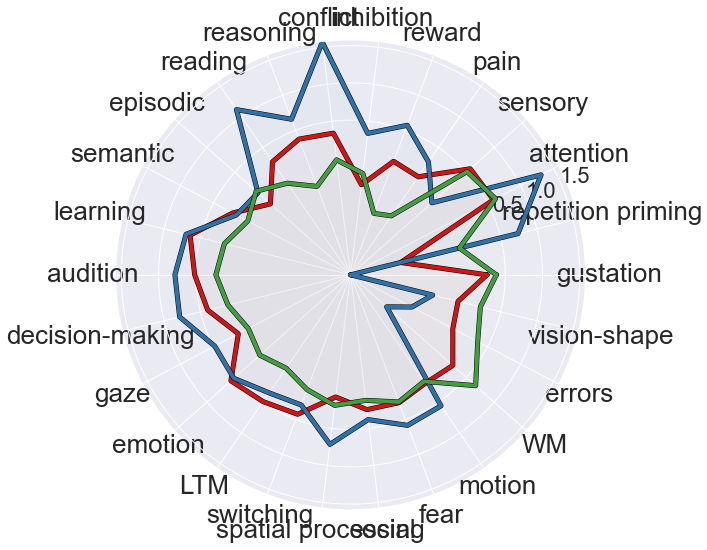

In [90]:
from base.plotting import plot_polar

sel_fi = avg_p_fi[avg_p_fi.region_a.isin([18, 19, 20])]

pplot = pd.pivot_table(sel_fi, values='importance', index=[key], columns=['region_a'])

cmap = sns.color_palette('Set1', avg_p_fi.region_a.unique().shape[0])

plot_polar(pplot, overplot=True, palette=cmap, n_top=20)

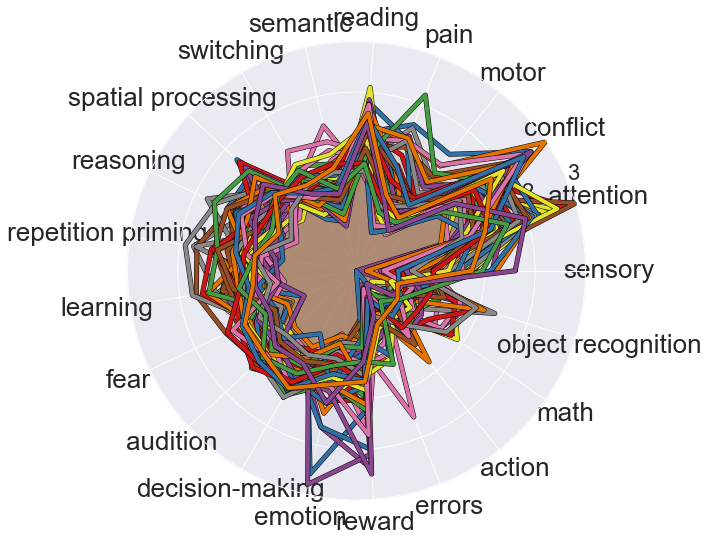

In [36]:
plot_pclf_polar(p_fi, 19, n_t)

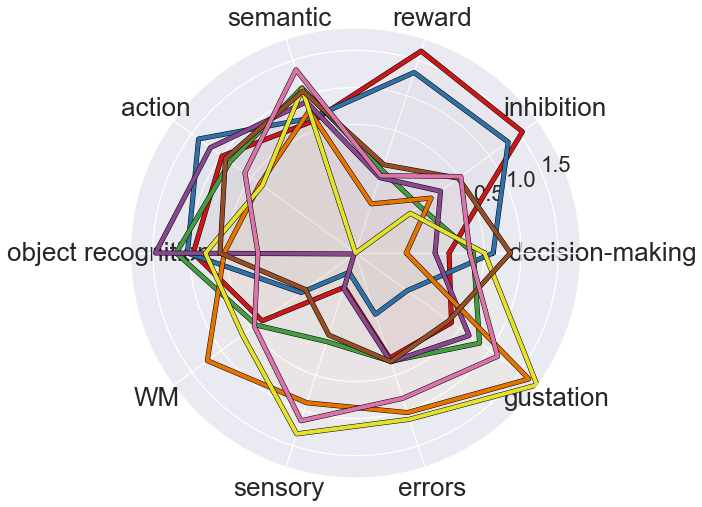

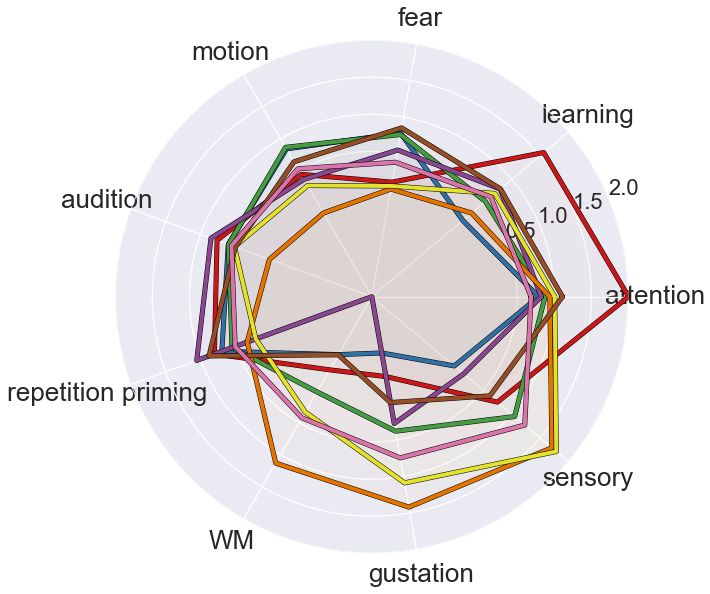

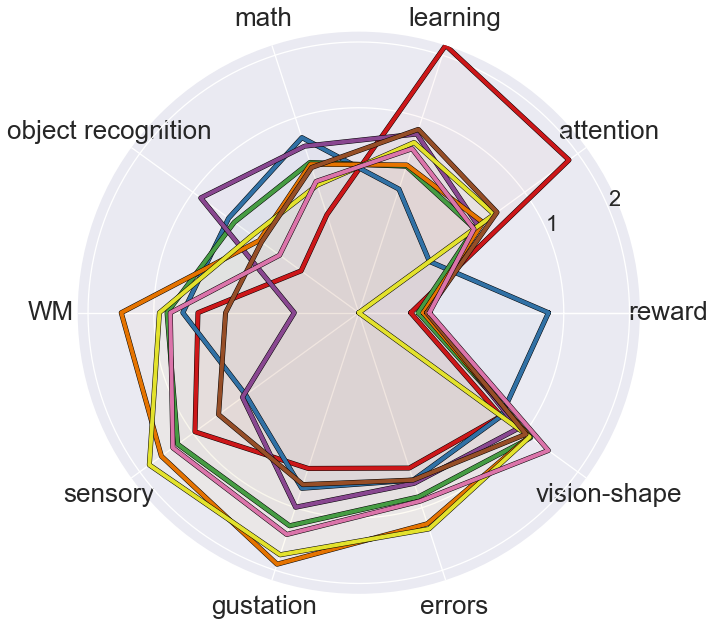

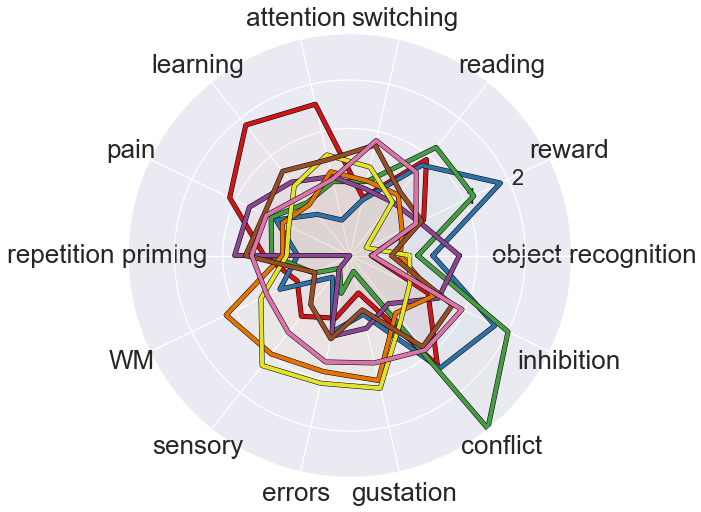

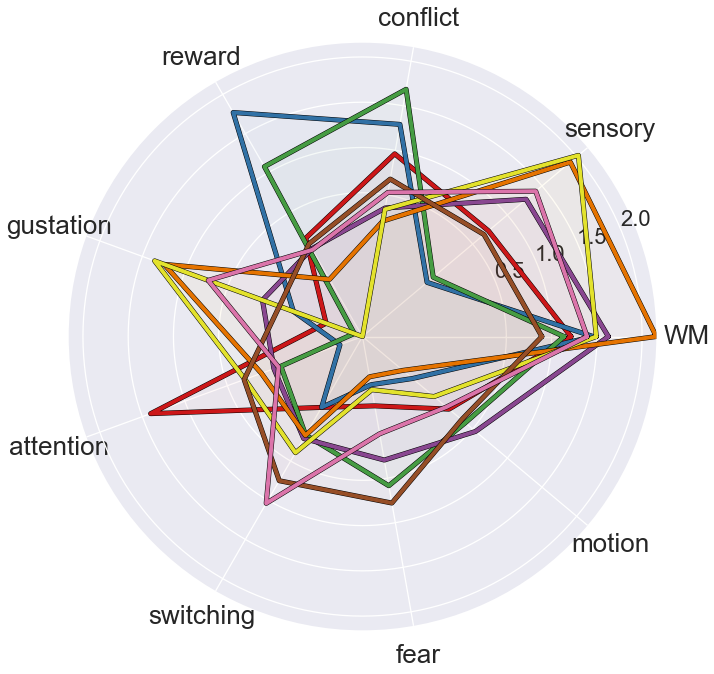

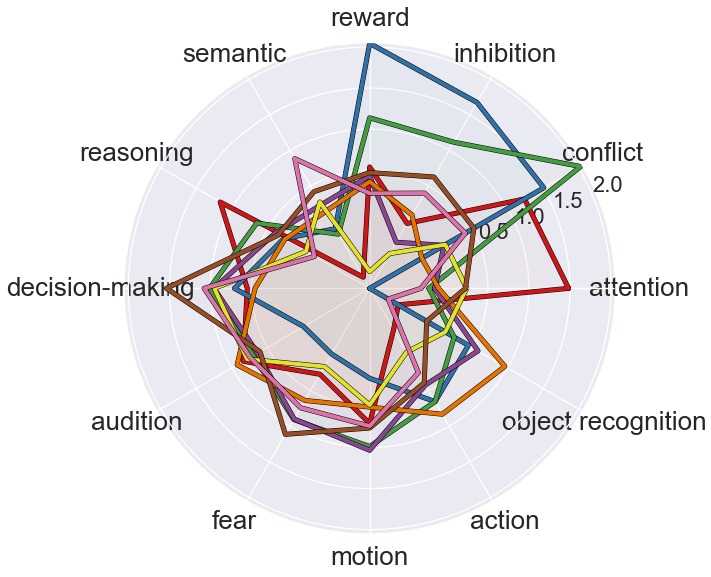

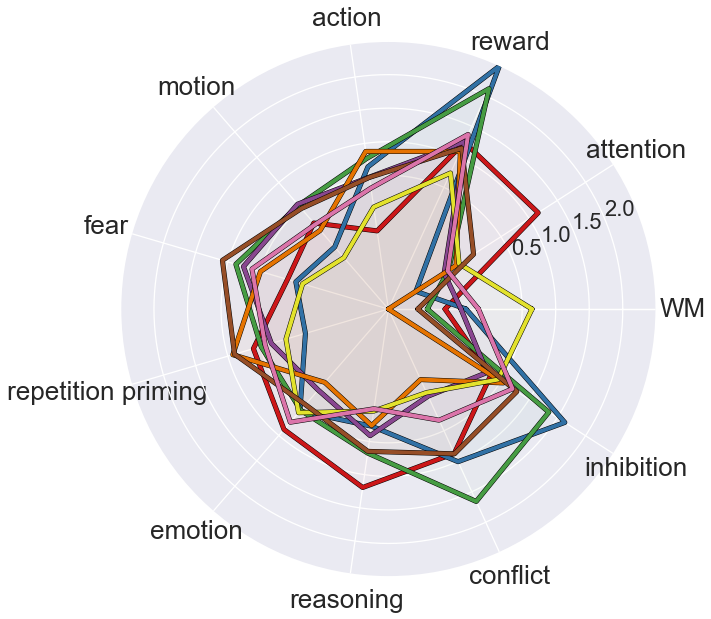

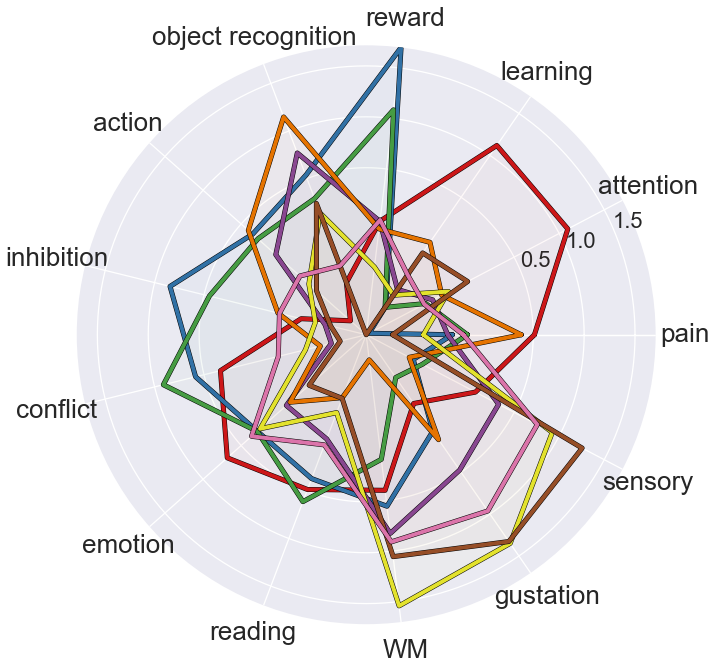

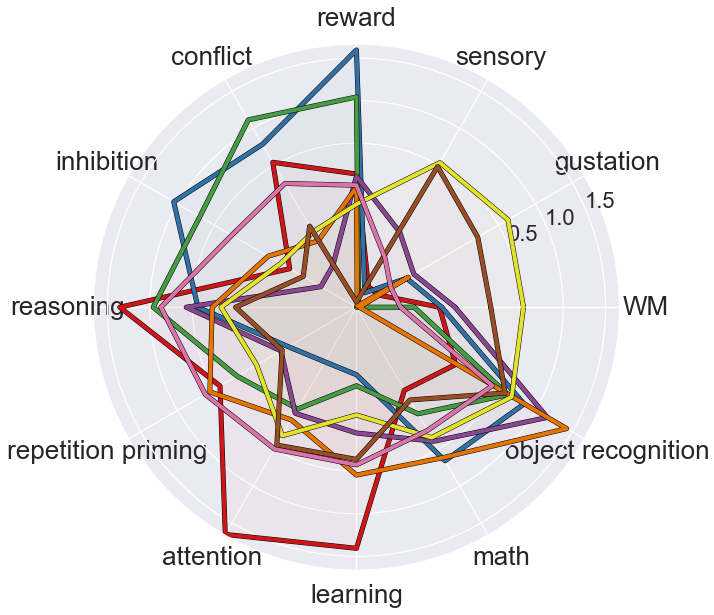

In [186]:
for i in range(1, 10):
    plot_pclf_polar(p_fi, i,)

In [187]:
core_regionsAll

OrderedDict([('preMotor', 1), ('IFGo', 2), ('IFS/IFJ', 3), ('LPFC', 4), ('PCC/Par', 5), ('vcIns', 6), ('dACC', 7), ('preSMA', 8), ('aIns', 9)])

In [193]:
p_fi[(p_fi.region_a == 2) & (p_fi.region_b == 7)]

,region_a,region_b,topic_order,importance,topic_name,topic,cognitive,nickname,words
13,2,7,1,0.471199,topic10,10,T,vision-shape,visual category adaptation color features disc...
85,2,7,2,-0.264766,topic11,11,T,episodic,memory events imagery autobiographical retriev...
157,2,7,3,-0.341758,topic12,12,T,object recognition,object objects visual recognition familiar unf...
229,2,7,4,-0.317886,topic15,15,T,motor,motor movement movements sensorimotor primary ...
301,2,7,5,1.005760,topic19,19,T,attention,attention attentional visual spatial target se...
373,2,7,6,0.472881,topic2,2,T,gaze,eye gaze movements eyes visual saccades saccad...
445,2,7,7,0.705493,topic20,20,T,learning,learning training performance practice sequenc...
517,2,7,8,0.226407,topic23,23,T,social,social empathy moral person judgments mentaliz...
589,2,7,9,-0.740643,topic26,26,T,math,arithmetic numerical mental magnitude calculat...
661,2,7,10,0.332646,topic27,27,T,language,sentences comprehension sentence language synt...


In [194]:
p_fi[(p_fi.region_b == 2) & (p_fi.region_a == 7)]

,region_a,region_b,topic_order,importance,topic_name,topic,cognitive,nickname,words
49,7,2,1,-0.471199,topic10,10,T,vision-shape,visual category adaptation color features disc...
121,7,2,2,0.264766,topic11,11,T,episodic,memory events imagery autobiographical retriev...
193,7,2,3,0.341758,topic12,12,T,object recognition,object objects visual recognition familiar unf...
265,7,2,4,0.317886,topic15,15,T,motor,motor movement movements sensorimotor primary ...
337,7,2,5,-1.005760,topic19,19,T,attention,attention attentional visual spatial target se...
409,7,2,6,-0.472881,topic2,2,T,gaze,eye gaze movements eyes visual saccades saccad...
481,7,2,7,-0.705493,topic20,20,T,learning,learning training performance practice sequenc...
553,7,2,8,-0.226407,topic23,23,T,social,social empathy moral person judgments mentaliz...
625,7,2,9,0.740643,topic26,26,T,math,arithmetic numerical mental magnitude calculat...
697,7,2,10,-0.332646,topic27,27,T,language,sentences comprehension sentence language synt...


### Test from scratch amygdala vs SMA

In [96]:
amyg_studies = dataset.get_studies(mask='../masks/L_Amyg.nii.gz', activation_threshold=0.05)
SMA_studies = dataset.get_studies(mask='../masks/JLC.nii.gz', activation_threshold=0.05)

In [100]:
amyg_X = dataset.get_feature_data(amyg_studies)
SMA_X = dataset.get_feature_data(SMA_studies)

In [106]:
y = [1] * amyg_X.shape[0]  + [0] * SMA_X.shape[0]

In [113]:
X = np.vstack([amyg_X, SMA_X])

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
gnb = GaussianNB()

In [117]:
gnb = gnb.fit(X, y)

In [132]:
odds_ratio = np.log(gnb.theta_[1] / gnb.theta_[0])

In [134]:
odds_ratio_df = pd.DataFrame({'topic' : amyg_X.columns, 'odds_ratio' : odds_ratio})

In [135]:
odds_ratio_df.sort('odds_ratio')

,odds_ratio,topic
7,-1.828481,topic15
31,-1.164394,topic37
32,-1.036017,topic38
12,-0.987797,topic2
17,-0.893894,topic24
33,-0.863234,topic39
44,-0.776555,topic49
26,-0.759740,topic32
25,-0.674286,topic31
19,-0.655402,topic26


### Compare to existing implementation

In [172]:
## Make combined mask
from neurosynth.base import imageutils
images = imageutils.load_imgs(['../masks/L_Amyg.nii.gz', '../masks/JLC.nii.gz'], dataset.masker)

In [173]:
images[images > 1] = 1
images[:, 1] = images[:, 1] * 2

In [174]:
images = images.sum(axis=1)

In [175]:
imageutils.save_img(images, '../masks/l_amyg_jlc.nii.gz', dataset.masker)

In [176]:
tpclf = PairwiseClassifier(dataset, '../masks/l_amyg_jlc.nii.gz', thresh=0.05, memsave=True, remove_overlap=False, 
                   classifier=GaussianNB())

In [180]:
from sklearn.metrics import roc_auc_score
tpclf.classify(scoring=roc_auc_score)

Classifying...
[##########] 100%


In [191]:
tpclf_or = tpclf.odds_ratio[1, 0].data

In [192]:

p_odds_ratio_df = pd.DataFrame({'topic' : tpclf.feature_names, 'odds_ratio' : tpclf_or})

In [193]:
p_odds_ratio_df.sort('odds_ratio')

,odds_ratio,topic
7,-1.828481,topic15
31,-1.164394,topic37
32,-1.036017,topic38
12,-0.987797,topic2
17,-0.893894,topic24
33,-0.863234,topic39
44,-0.776555,topic49
26,-0.759740,topic32
25,-0.674286,topic31
19,-0.655402,topic26


### Try again w/ FPN mask

In [221]:
fpnclf = PairwiseClassifier(dataset, '../results/clustering/hierarchical/fastward_FPN_min120/cluster_labels_k9.nii.gz', 
                            thresh=0.05, memsave=True, remove_overlap=True, classifier=GaussianNB())

In [222]:
import csv
topics = 60
cognitive_topics = ['topic' + topic[0] for topic in csv.reader(open('../data/unprocessed/abstract_topics_filtered/topic_sets/topic_keys'  + str(topics) + '-july_cognitive.csv', 'rU')) if topic[1] == "T"]

In [223]:
fpnclf.classify(scoring=roc_auc_score, features=cognitive_topics)

Loading data from neurosynth...
[##########] 100%
Classifying...
[##########] 100%


In [240]:
pair_clfs = [OnevsallClassifier.load(clf + "/classifier.pkl") for clf in glob.glob("../results/classification/FPN_hier9*Pairwise*GNB*/")]

In [242]:
fpnclf = pair_clfs[0]

In [245]:
fpnclf_or = fpnclf.odds_ratio[0, 1].data
fpn_or_df = pd.DataFrame({'topic' : fpnclf.feature_names, 'odds_ratio' : fpnclf_or})
fpn_or_df.sort('odds_ratio')

,odds_ratio,topic
4,-2.001641,topic15
6,-1.565343,topic2
31,-0.799488,topic7
7,-0.794955,topic20
23,-0.765003,topic49
13,-0.761683,topic32
29,-0.751016,topic59
28,-0.700862,topic58
5,-0.687147,topic19
9,-0.644949,topic26


In [226]:
fpnclf.odds_ratio.max()

2.9440966048536903

In [227]:
fpnclf.odds_ratio.min()

-2.9440966048536907

In [228]:
fpnclf.odds_ratio.mean()

-5.9809994592601023e-18